In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv(r"car_data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
missing_values = df.isnull().sum() # no missing values
print(missing_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [5]:
dublicates_values = df.duplicated().sum() #dublicates values
print(dublicates_values)

2


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
dublicates_values = df.duplicated().sum() # no dublicates values
print(dublicates_values)

0


In [43]:
new_data=df.drop(["Car_Name","Seller_Type"], axis=1)
new_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Manual,0
1,2013,4.75,9.54,43000,Diesel,Manual,0
2,2017,7.25,9.85,6900,Petrol,Manual,0
3,2011,2.85,4.15,5200,Petrol,Manual,0
4,2014,4.60,6.87,42450,Diesel,Manual,0


In [44]:
#move target column to the last
selling_price_column = new_data.pop("Selling_Price")
new_data.insert(len(new_data.columns), "Selling_Price", selling_price_column)
new_data.head()



,Year,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,Petrol,Manual,0,3.35
1,2013,9.54,43000,Diesel,Manual,0,4.75
2,2017,9.85,6900,Petrol,Manual,0,7.25
3,2011,4.15,5200,Petrol,Manual,0,2.85
4,2014,6.87,42450,Diesel,Manual,0,4.60


In [11]:
len(new_data)

299

In [12]:
new_data.shape

(299, 7)

In [13]:
X=new_data.iloc[:,:-1].values
y=new_data.iloc[:,-1]
X

# y

array([[2014, 5.59, 27000, 'Petrol', 'Manual', 0],
       [2013, 9.54, 43000, 'Diesel', 'Manual', 0],
       [2017, 9.85, 6900, 'Petrol', 'Manual', 0],
       ...,
       [2009, 11.0, 87934, 'Petrol', 'Manual', 0],
       [2017, 12.5, 9000, 'Diesel', 'Manual', 0],
       [2016, 5.9, 5464, 'Petrol', 'Manual', 0]], dtype=object)

In [14]:
print('fuel: ',new_data.Fuel_Type.nunique())
#print('Seller_Type: ',new_data.Seller_Type.nunique())
print('Transmission: ',new_data.Transmission.nunique())
print('Owner: ',new_data.Fuel_Type.nunique())

fuel:  3
Transmission:  2
Owner:  3


In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
lb=LabelEncoder()
X[:,4]=lb.fit_transform(X[:,4])
#X[:,5]=lb.fit_transform(X[:,5])
X
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer([('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X= np.array(ct.fit_transform(X))
ct= ColumnTransformer([('encoder',OneHotEncoder(),[7])],remainder='passthrough')
X= np.array(ct.fit_transform(X))
X
z=pd.DataFrame(X)
z.head()




,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,1.0,2014,5.59,27000,1
1,1.0,0.0,0.0,0.0,1.0,0.0,2013,9.54,43000,1
2,1.0,0.0,0.0,0.0,0.0,1.0,2017,9.85,6900,1
3,1.0,0.0,0.0,0.0,0.0,1.0,2011,4.15,5200,1
4,1.0,0.0,0.0,0.0,1.0,0.0,2014,6.87,42450,1


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# X_train.shape
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train




array([[ 0.2045983 , -0.19245009, -0.06696495, ...,  0.66375849,
        -0.21896517,  0.34641016],
       [ 0.2045983 , -0.19245009, -0.06696495, ..., -0.42808421,
        -0.86797344,  0.34641016],
       [ 0.2045983 , -0.19245009, -0.06696495, ...,  1.4238319 ,
         0.48621772,  0.34641016],
       ...,
       [ 0.2045983 , -0.19245009, -0.06696495, ..., -0.63446911,
        -1.02659806,  0.34641016],
       [ 0.2045983 , -0.19245009, -0.06696495, ...,  0.0102063 ,
        -0.33263654,  0.34641016],
       [ 0.2045983 , -0.19245009, -0.06696495, ..., -0.76540146,
         0.0989282 ,  0.34641016]])

In [17]:
d=pd.DataFrame(X_train)
d.describe()

,0,1,2,3,4,5,6,7,8,9
count,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,-9.516197e-17,1.189525e-17,-1.982541e-17,-2.379049e-17,-3.965082e-17,-6.740640e-17,2.217076e-14,-1.149874e-16,3.172066e-17,-7.731910e-17
std,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,-4.887626e+00,-1.924501e-01,-6.696495e-02,-6.696495e-02,-4.803845e-01,-2.051658e+00,-3.614487e+00,-8.097853e-01,-1.192715e+00,-2.886751e+00
25%,2.045983e-01,-1.924501e-01,-6.696495e-02,-6.696495e-02,-4.803845e-01,4.874106e-01,-5.450659e-01,-7.187984e-01,-7.011447e-01,3.464102e-01
50%,2.045983e-01,-1.924501e-01,-6.696495e-02,-6.696495e-02,-4.803845e-01,4.874106e-01,1.370277e-01,-1.867470e-01,-1.412462e-01,3.464102e-01
75%,2.045983e-01,-1.924501e-01,-6.696495e-02,-6.696495e-02,-4.803845e-01,4.874106e-01,8.191213e-01,2.545949e-01,4.455784e-01,3.464102e-01
max,2.045983e-01,5.196152e+00,1.493318e+01,1.493318e+01,2.081666e+00,4.874106e-01,1.160168e+00,9.429569e+00,6.011331e+00,3.464102e-01


In [18]:
#Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
#----------------------------------------------------

#Applying Linear Regression Model 

LinearRegressionModel = LinearRegression(fit_intercept=True, copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Linear Regression Train Score is :  0.885907303930277
Linear Regression Test Score is :  0.8390170564845928
Linear Regression Coef is :  [-3.39054917e+13 -3.20406584e+13 -1.15101768e+13 -7.45415477e+12
 -4.36421677e+13 -4.40371789e+13  1.06542969e+00  4.14550781e+00
 -2.69531250e-01 -2.99331665e-01]
Linear Regression intercept is :  4.555520729839879
----------------------------------------------------
Predicted Value for Linear Regression is :  [ 5.88710962 -1.28014285  6.86836285  4.53724435  2.19599687  2.09198148
  6.50731005  4.73629618 16.41834902  2.59218759]
Mean Absolute Error Value is :  1.2319116265166266
Mean Squared Error Value is :  4.198955280592447
Median Squared Error Value is :  0.8083834652322155


In [45]:
import plotly.express as px
fig = px.scatter(df, 
                   x='Present_Price',
                   y='Selling_Price', 
                   opacity=0.8,
                 title='present price vs selling price'
                   )
fig.update_traces(marker_size=5)
fig.show()

In [21]:
fig = px.histogram(new_data, 
                   x='Kms_Driven',
                   marginal='box', 
                   color_discrete_sequence=['blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
#distinguish selling prices for Manual cars and Automatic cars
fig = px.histogram(new_data, 
                   x='Selling_Price', 
                   marginal='box', 
                   color='Transmission', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.scatter(new_data, 
                 x='Year',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Year vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()

In [24]:
fig = px.scatter(new_data, 
                 x='Kms_Driven',
                 y='Selling_Price', 
                 opacity=0.8, 
                 title='Kilometers driven vs. Selling Price')
fig.update_traces(marker_size=5)
fig.show()


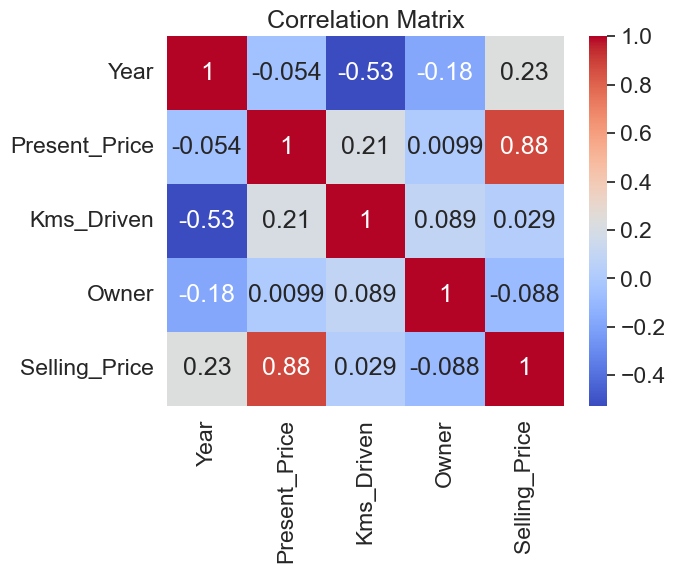

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = new_data.corr(numeric_only=True)

# Set font scale for seaborn
sns.set(font_scale=1.5)

# Plot heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

# Set title
plt.title('Correlation Matrix', fontsize=18)

# Show plot
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam
import tensorflow as tf
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

seed = 6
np.random.seed(seed)


def create_model(neuron1=8, neuron2=16,activation='relu',optimizer='adam'):
    # Define the model
    model = Sequential()
    model.add(Dense(10, activation=activation, input_shape=(X_train.shape[1],))) #input layerr
    model.add(Dense(neuron1, activation=activation))  #hidden layer
    model.add(Dense(neuron2, activation=activation))  #hidden layer
    model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

    # Compile the model
    model.compile(optimizer=optimizer, loss='mse', metrics=['r2_score'])
    return model
model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=4, verbose=0,neuron1=8, neuron2=16,activation='relu')

# define the grid search parameters
neuron1 = [8, 16, 32]
neuron2 = [16, 32, 64]
activation=['relu','tanh', 'linear']
optimizer= ['adam', 'adadelta', 'nadam']


param_grid = dict(neuron1 = neuron1, neuron2 = neuron2, activation = activation, optimizer = optimizer) 

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed,shuffle=True), refit = True, verbose = 10)
grid_results = grid.fit(X, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START activation=relu, neuron1=8, neuron2=16, optimizer=adam.....


C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scikeras\wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV 1/5; 1/81] END activation=relu, neuron1=8, neuron2=16, optimizer=adam;, score=-28.636 total time=   3.2s
[CV 2/5; 1/81] START activation=relu, neuron1=8, neuron2=16, optimizer=adam.....


C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scikeras\wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV 2/5; 1/81] END activation=relu, neuron1=8, neuron2=16, optimizer=adam;, score=-101.136 total time=   2.9s
[CV 3/5; 1/81] START activation=relu, neuron1=8, neuron2=16, optimizer=adam.....


C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scikeras\wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



[CV 3/5; 1/81] END activation=relu, neuron1=8, neuron2=16, optimizer=adam;, score=-0.233 total time=   2.9s
[CV 4/5; 1/81] START activation=relu, neuron1=8, neuron2=16, optimizer=adam.....


C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scikeras\wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



KeyboardInterrupt: 

In [28]:
KerasRegressor().get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [29]:
#use the best hyperparameters
neuron1=16
neuron2=64
activation='tanh'
optimizer='nadam'

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(10, activation=activation, input_shape=(X_train.shape[1],))) #input layerr
model.add(Dense(neuron1, activation=activation))#hidden layer
model.add(Dense(neuron2, activation=activation))#hidden layer
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['r2_score'])
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,439 (5.62 KB)

 Trainable params: 1,439 (5.62 KB)

 Non-trainable params: 0 (0.00 B)

None


In [31]:
#Train the Model
history=model.fit(X_train, y_train, epochs=20, batch_size=4,validation_data=(X_test, y_test),)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 55.5843 - r2_score: -0.7429 - val_loss: 38.7763 - val_r2_score: -0.4866
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.2528 - r2_score: -0.4860 - val_loss: 24.4093 - val_r2_score: 0.0642
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.1209 - r2_score: 0.1328 - val_loss: 15.1838 - val_r2_score: 0.4179
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.3774 - r2_score: 0.4228 - val_loss: 12.5678 - val_r2_score: 0.5182
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8931 - r2_score: 0.6274 - val_loss: 11.4617 - val_r2_score: 0.5606
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7081 - r2_score: 0.7562 - val_loss: 10.6050 - val_r2_score: 0.5934
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5491 - r2_score: 0.7074 - val_loss: 9.8252 - val_r2_score: 0.6233
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4740 - r2_score: 0.6708 - val_loss: 9.1243 -

In [32]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print('r2 score:', acc)
print('mse:', loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0553 - r2_score: 0.8324 
r2 score: 0.8285996913909912
mse: 4.470674514770508


In [33]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 82.86%


In [34]:
#save model
model.save('my_model.keras')

In [35]:
new_model = tf.keras.models.load_model('my_model.keras')

In [36]:
# Make predictions
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [37]:

da = pd.DataFrame(y_test)
da['Selling_Price_Predicted']=y_pred
da

,Selling_Price,Selling_Price_Predicted
208,7.90,8.037057
190,0.20,1.006264
12,7.50,7.856890
221,4.50,4.544428
239,2.00,2.878100
...,...,...
158,0.48,0.392352
228,4.95,5.781413
274,5.30,5.263165
28,1.95,2.071981


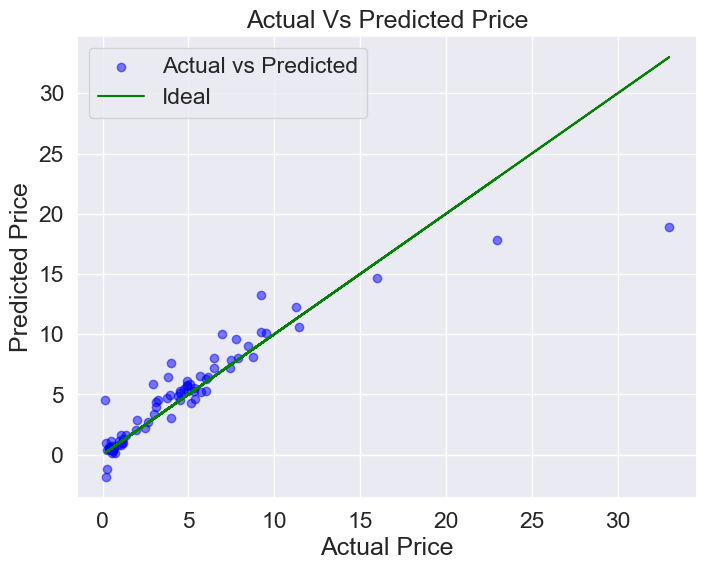

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Actual vs Predicted")
plt.plot(y_test, y_test, color='green', label='Ideal' )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted Price")
plt.legend()
plt.grid(True)
plt. show()

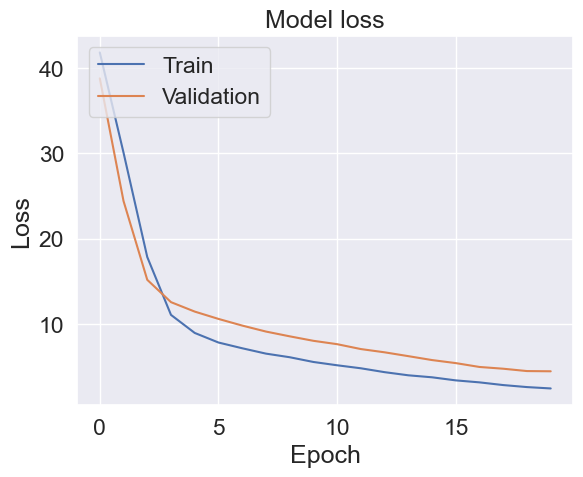

In [39]:
# Visualize Training History
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


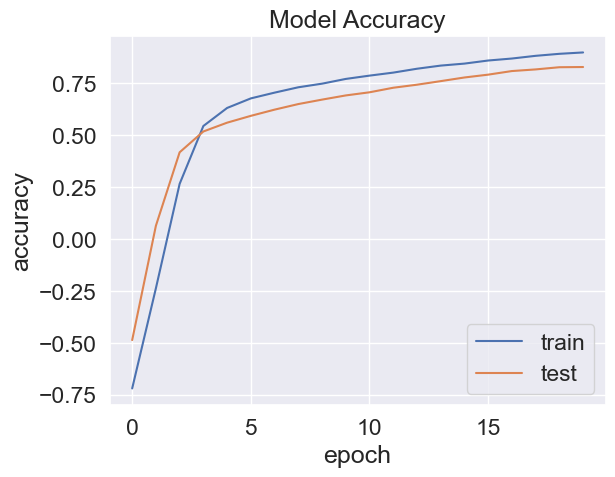

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [41]:
def train_model_and_predict(data_file, new_car_features):
    data = pd.read_csv(data_file)

    # Preprocess the dataset
    current_year = 2024 
    data['Age'] = current_year - data['Year']
    features = ['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Transmission', 'Owner']
    X = data[features]
    y = data['Selling_Price']

   
    ct = ColumnTransformer([
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Fuel_Type', 'Transmission'])], remainder='passthrough')
    X_encoded = ct.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Train 
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Preprocess new car features 
    new_car = pd.DataFrame([new_car_features], columns=features)  
    new_car['Age'] = current_year - new_car['Age']  

    new_car_encoded = ct.transform(new_car)  
    predicted_price = model.predict(new_car_encoded)
    return predicted_price[0]


data_file = 'car_data.csv' 
new_car_features = [2019, 10.0, 50000, 'gasoline', 'automatic', 1]  

predicted_price = train_model_and_predict(data_file, new_car_features)
print(f'Predicted Price for New Car: ${predicted_price:.2f}')




Predicted Price for New Car: $7.29


C:\Users\Mohamed\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning:

Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros

